In [3]:
pip install treeinterpreter


Note: you may need to restart the kernel to use updated packages.


In [4]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error as MSE
#from scipy.stats import spearmanr, pearsonr
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.cluster import hierarchy as hc
import scipy
from treeinterpreter import treeinterpreter as ti
from collections import Counter


In [6]:
df =  pd.read_excel('Absenteeism_at_work.xls')
df.head()
#read the dataset in excel format and print using head function - first few rows

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [7]:
df.shape
#shape tells us the number of rows and columns; here there are 740 rows and 21 columns

(740, 21)

In [8]:
df.info()
#info function tells us the concise summary of the dataframe; it tells us about the datatypes and the count of non null values; 
#here there are 21 int valued columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [10]:
df.columns = df.columns.str.replace('/', 'per').str.strip()
#The above results shows that this dataset has just 740 rows with the size of 122 KB. One of the column "Work load Average/day" has forward slash and we are replacing to avoid unnecessary errors in future.

In [11]:
df.groupby('ID')[['ID']].count().head()
#grouping by ID; it tells us that its not a relevant column as it is not a continuous one.

,ID
ID,
1,23
2,6
3,113
4,1
5,19


In [12]:
len(df.columns)
#using len function checking the dataset length

21

In [13]:
df.dtypes
#dtypes tells us the datatype of each column in the dataset; here all the values are in integer datatype

ID                                 int64
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Averageperday            int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
dtype: object

In [14]:
df.describe()
#it tells us the statistical inferences of the dataset

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


#From the above statistical table we can understand: We can see that for each column we have the following functions

count- Number of non-null observations here all the columns contain 740 entries 

mean- Mean of Values here mean of each column is found ie, mean of ID column= 18.017568 , Reason for absence is 19.216216, etc

std- Standard Deviation of the Values here standard deviation for ID is 11.021247 , Reason for absence is 8.433406  etc

min- Minimum value here it shows the min value for ID is 1 , Reason for absence is 0 etc

max- Maximum value it shows the max value for ID is 36 , Reason for absence is 28.

25%, 50%, and 75% - IQR values it shows percentile values at 25%,50% and 75% ; for ID is 9 , 18 ,and 28  respectively.

In [15]:
df.isnull().sum()
#lets check the presence of any null values

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Averageperday            0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

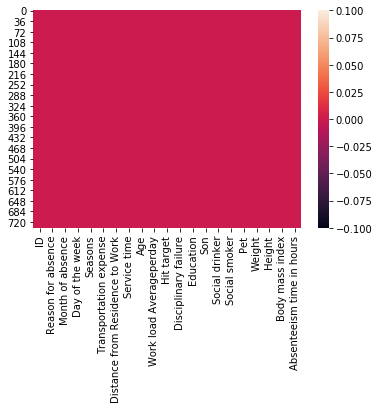

In [16]:
sns.heatmap(df.isnull())
#using heatmap lets check the null value; its clear that there are no null values

In [17]:
#Manually setting up the data types of certain variables for EDA purpose

df['Social drinker'] = df['Social drinker'].astype('bool')
df['Social smoker'] = df['Social smoker'].astype('bool')
df['Disciplinary failure'] = df['Disciplinary failure'].astype('bool')
df['Seasons'] = df['Seasons'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Day of the week'] = df['Day of the week'].astype('category')
df['Month of absence'] = df['Month of absence'].astype('category')
df['Reason for absence'] = df['Reason for absence'].astype('category')

In [18]:
df['Absenteeism time in hours'].describe

<bound method NDFrame.describe of 0      4
1      0
2      2
3      4
4      2
      ..
735    8
736    4
737    0
738    0
739    0
Name: Absenteeism time in hours, Length: 740, dtype: int64>

In [19]:
df[df['Month of absence']==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
737,4,0,0,3,1,118,14,13,40,271219,...,False,1,1,True,False,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,False,1,2,True,False,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271219,...,False,1,1,False,False,1,77,175,25,0


In [20]:
#Now let us check the invalid values in the target variable.

df[df['Reason for absence']==27][['Absenteeism time in hours']].mean()

Absenteeism time in hours    2.275362
dtype: float64

In [21]:
#We can see the mean value for Reason 27 and let us update Absenteeism hours as 3 for this row.

df.loc[(df['Reason for absence']==27) & (df['Absenteeism time in hours']==0),'Absenteeism time in hours']=3

In [22]:
#After updating the value for the above row, now we can update Absenteeism in hours as 8 for all the rows with Disciplinary failure.

df.loc[(df['Absenteeism time in hours']==0),'Absenteeism time in hours']=8

In [23]:
len(df[df['Absenteeism time in hours']==8])

251

We performed some data cleaning in excel which are not specified here

After checking the zero values in Absenteeism in hours column, let us get ready for Exploratory Data Analysis. It's better to add additional columns for visualization as this dataset has only numeric values.



In [24]:
season_mapping = {1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'}
df['season_name'] = df.Seasons.map(season_mapping)
df['season_name'] = df['season_name'].astype('category')
df.drop_duplicates(['Seasons', 'season_name'])[['Seasons','season_name']]

,Seasons,season_name
0,1,Summer
49,4,Spring
111,2,Autumn
175,3,Winter


The above will have Season Name along with Season and the below command will have Month names.



In [25]:
import calendar
df['month_name'] =  df['Month of absence'].apply(lambda x: calendar.month_abbr[x])

In [26]:
reason_mapping = {
    0: 'Unknown',
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
     28: 'Dental consultation'
}
df['reason_text'] = df['Reason for absence'].map(reason_mapping)

In [27]:
education_mapping = {
    1: 'High School',
    2: 'Graduate',
    3: 'Post Graduate',
    4: 'Master & Doctor'
}
education_list = {'High School', 'Graduate', 'Post Graduate', 'Master & Doctor'}
df['Education_detail'] = df['Education'].map(education_mapping)
#df['Education_detail'] = df['Education_detail'].astype('category')
category_education = pd.api.types.CategoricalDtype(categories=education_list, ordered=True)
df['Education_detail'] = df['Education_detail'].astype(category_education)

In [28]:
#After adding new columns for the reference columns, let us quickly check the first 5 rows from the dataset.

df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,...,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,season_name,month_name,reason_text,Education_detail
0,11,26,7,3,1,289,36,13,33,239554,...,False,1,90,172,30,4,Summer,Jul,Unjustified absence,High School
1,36,0,7,3,1,118,13,18,50,239554,...,False,0,98,178,31,8,Summer,Jul,Unknown,High School
2,3,23,7,4,1,179,51,18,38,239554,...,False,0,89,170,31,2,Summer,Jul,Medical consultation,High School
3,7,7,7,5,1,279,5,14,39,239554,...,True,0,68,168,24,4,Summer,Jul,Diseases of the eye and adnexa,High School
4,11,23,7,5,1,289,36,13,33,239554,...,False,1,90,172,30,2,Summer,Jul,Medical consultation,High School


In [29]:
df.shape

(740, 25)

Exploratory Data Analysis

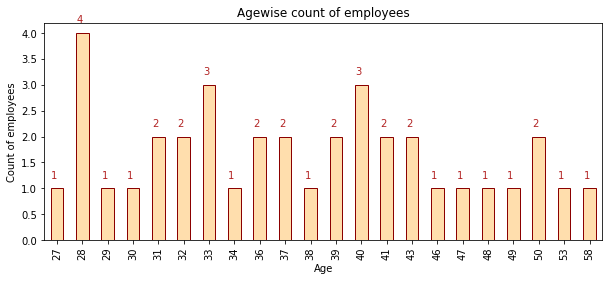

In [30]:
#Agewise Employee Count

age_count = df.groupby(['Age']).agg({'ID': pd.Series.nunique})
ax = age_count.plot(kind='bar', figsize=(10,4), legend=False, color="navajowhite",edgecolor='darkred')
for i, v in enumerate(age_count.values):
    ax.text(i-.24, v +0.2, str(v[0]), color='firebrick')
ax.set_xlabel('Age')
ax.set_ylabel('Count of employees')
ax.set_title('Agewise count of employees')
plt.show()

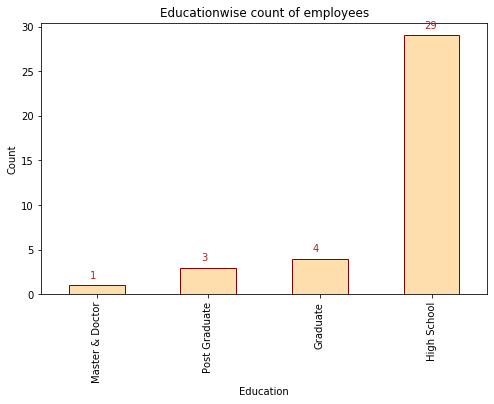

In [31]:
#Educationwise Employee Count

#The below graph shows that High School educated employees are higher than the rest.

edu_count = df.groupby(['Education_detail']).agg({'ID': pd.Series.nunique})
ax = edu_count.plot(kind='bar', figsize=(8,5), legend=False, color="navajowhite",edgecolor='darkred')
for i, v in enumerate(edu_count.values):
    ax.text(i-.065, v + 0.8, str(v[0]), color='firebrick')
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Educationwise count of employees')
plt.show()

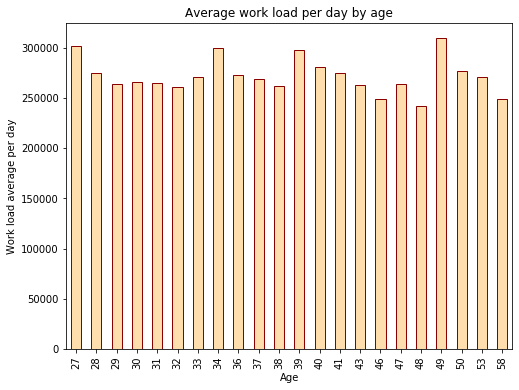

In [32]:
#Average work load by Age

#The work load seems to be same irrespective of the age.

age_work_sum = df.groupby('Age', as_index=False)[['Work load Averageperday']].mean()
ax = age_work_sum.plot(kind='bar', x='Age', figsize=(8,6), legend=False, color="navajowhite",edgecolor='darkred')
ax.set_ylabel('Work load average per day')
ax.set_title('Average work load per day by age')
plt.show()


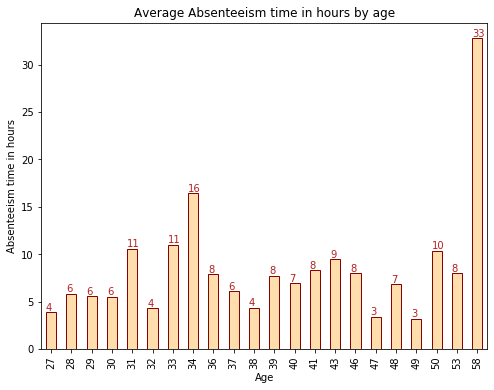

In [33]:
# Average Absenteeism hours by Age
#Absenteeism seems to be same across Age except for one age.


age_abs = df.groupby('Age')[['Absenteeism time in hours']].mean()
ax = age_abs.plot(kind='bar', figsize=(8,6), legend=False, color="navajowhite",edgecolor='darkred')
for i, v in enumerate(age_abs.values):
    ax.text(i-.25, v + 0.2, str(np.int(np.round(v))), color='firebrick')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by age')
plt.show()

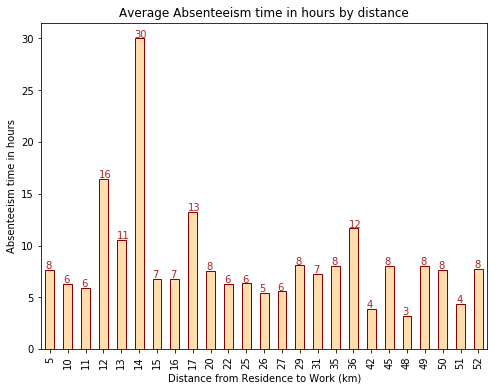

In [34]:
# Average Absenteeism hours by Distance to work

#The hypothesis i have was that if the distance to work increase the absenteeism hours will increase. But the below graph nullifies my hypothesis.

dis_abs = df.groupby('Distance from Residence to Work')[['Absenteeism time in hours']].mean()
ax = dis_abs.plot(kind='bar', figsize=(8,6), legend=False, color="navajowhite",edgecolor='darkred')
for i, v in enumerate(dis_abs.values):
    ax.text(i-.25, v + 0.1, str(np.int(np.round(v))), color='firebrick')
ax.set_xlabel('Distance from Residence to Work (km)')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by distance')
plt.show()

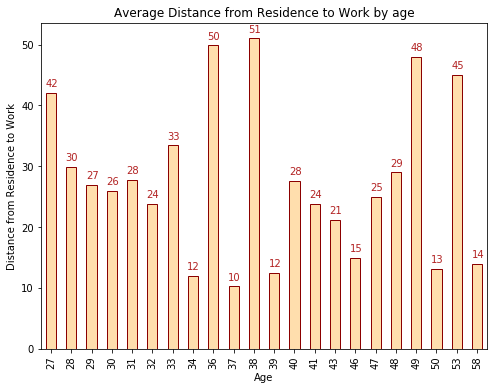

In [35]:
#Average distance to work by Age

#Another hypothesis I had was that higher age employees might stay closer to the office. It might be true till the Age 33, but the other values are not significant to compare.

age_dis = df.groupby('Age')[['Distance from Residence to Work']].mean()

ax = age_dis.plot(kind='bar', figsize=(8,6), legend=False, color="navajowhite",edgecolor='darkred')

for i, v in enumerate(age_dis.values):
    ax.text(i-.28, v + 1, str(np.int(np.round(v))), color='firebrick')
ax.set_ylabel('Distance from Residence to Work')
ax.set_title('Average Distance from Residence to Work by age')
plt.show()

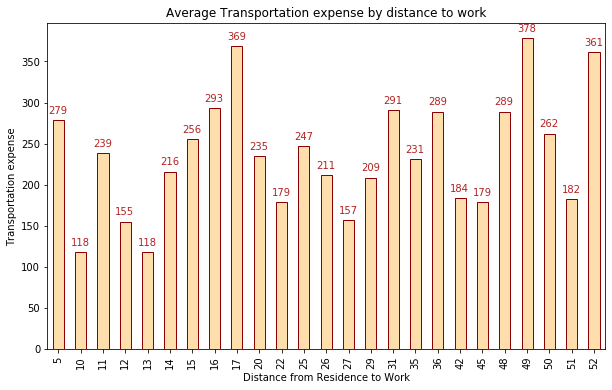

In [36]:
#Average Transportation expense by Distance

#The transportation expense is not increasing by distance but we don't have transport mode, so this is not helping us.

dis_exp = df.groupby('Distance from Residence to Work')[['Transportation expense']].mean()
ax = dis_exp.plot(kind='bar', figsize=(10,6), legend=False, color="navajowhite",edgecolor='darkred')
for i, v in enumerate(dis_exp.values):
    ax.text(i-.45, v + 8, str(np.int(np.round(v))), color='firebrick')
ax.set_ylabel('Transportation expense')
ax.set_title('Average Transportation expense by distance to work')
plt.show()

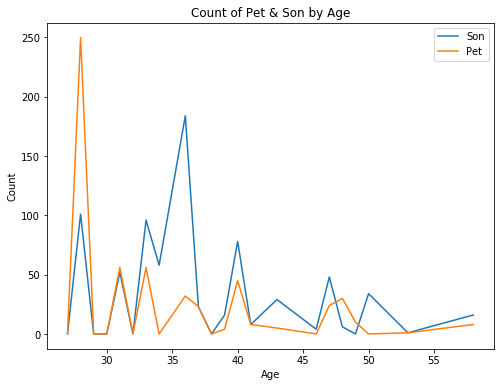

In [37]:
#Pet & Son counts by Age

#The below graph shows that the employees who has Son are mostly having a pet. This is interesting.

ax = df.groupby('Age')['Son', 'Pet'].sum().plot(figsize=(8,6))
ax.set_ylabel('Count')
ax.set_title('Count of Pet & Son by Age')
plt.show()


In [38]:
#Smoker & Drinker Stats

#How much percentage of Social Drinkers are Social Smokers also?

# % of Social drinker those are smokers
emp_social = df.drop_duplicates(['ID', 'Social drinker', 'Social smoker'])[['ID', 'Social drinker', 'Social smoker']]
emp_social[emp_social['Social drinker']==True]['Social smoker'].mean()

0.21052631578947367

In [39]:
#How much percentage of Social Smokers are Social Drinkers also?
# % of Social smokers are drinkers
emp_social[emp_social['Social smoker']==True]['Social drinker'].mean()

0.5714285714285714

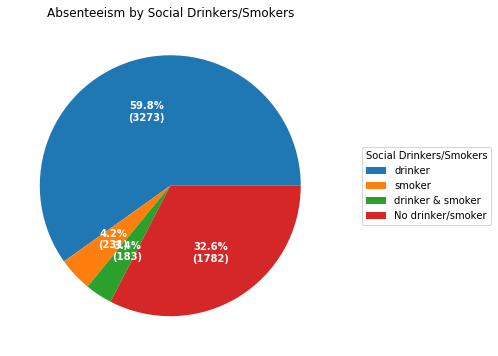

In [40]:
# Absenteeism by Social habits

#Looks like 60% of Social drinkers are absent and interestingly 32% of Non-smoker & Non-drinker are also absent.

drink_sum = df[(df['Social drinker'] == True) & (df['Social smoker']==False)]['Absenteeism time in hours'].sum()
smok_sum = df[(df['Social drinker'] == False) & (df['Social smoker']==True)]['Absenteeism time in hours'].sum()
drink_smok_sum = df[(df['Social drinker'] == True) & (df['Social smoker']==True)]['Absenteeism time in hours'].sum()
abs_sum = df[(df['Social drinker'] == False) & (df['Social smoker']==False)]['Absenteeism time in hours'].sum()
absen = [drink_sum, smok_sum, drink_smok_sum, abs_sum]
pie_labels = ['drinker', 'smoker', 'drinker & smoker', 'No drinker/smoker']
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(absen, autopct=lambda pct: func(pct, absen), textprops=dict(color='w'))
ax.legend(wedges, pie_labels, title='Social Drinkers/Smokers', loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title('Absenteeism by Social Drinkers/Smokers')
#plt.pie(absen, labels=pie_labels)
plt.show()

In [41]:
# Absenteeism by Reason

#The below table shows the highest Abseenteeism hours to lowest by Reason. The data is from courier company and the employees needs to deliver the packages and the Top 2 reason for absence shows that. There is one hack to hide the index column.
reason_abs = df.groupby('reason_text', as_index=False)['Absenteeism time in hours'].sum()
with pd.option_context('display.max_colwidth', -1):
    display(reason_abs.sort_values('Absenteeism time in hours', ascending=False).style.hide_index())

reason_text,Absenteeism time in hours
Diseases of the musculoskeletal system and connective tissue,842
"Injury, poisoning and certain other consequences of external causes",729
Medical consultation,424
Unknown,344
Dental consultation,335
Diseases of the digestive system,297
Patient follow-up,293
Diseases of the respiratory system,276
Unjustified absence,240
"Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",217


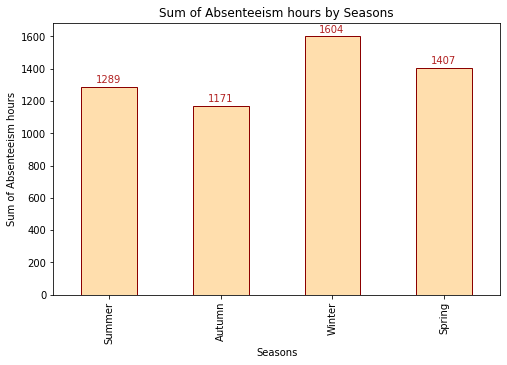

In [42]:
#Absenteeism hours by Seasons

#Looks like winter has highest Absenteeism.

season_abs = df.groupby('season_name')['Absenteeism time in hours'].sum()
ax = season_abs.plot(kind='bar', figsize=(8,5), legend=False, color="navajowhite",edgecolor='darkred')
for i, v in enumerate(season_abs.values):
    ax.text(i-.12, v + 22, str(np.int(np.round(v))), color='firebrick')
ax.set_xlabel('Seasons')
ax.set_ylabel('Sum of Absenteeism hours')
ax.set_title('Sum of Absenteeism hours by Seasons')
plt.show()

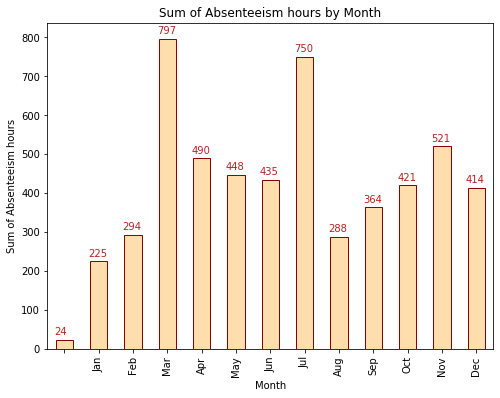

In [43]:
# Absenteeism hours by Month

#Getting to detail from Seasons to Month, Looks like March & July has the highest number of Absenteeism hours.

month_abs = df.groupby('month_name')['Absenteeism time in hours'].sum()
ax = month_abs.plot(kind='bar', figsize=(8,6), legend=False, color="navajowhite",edgecolor='darkred')
for i, v in enumerate(month_abs.values):
    ax.text(i-0.3, v + 12, str(np.int(np.round(v))), color='firebrick')
ax.set_xlabel('Month')
ax.set_ylabel('Sum of Absenteeism hours')
ax.set_title('Sum of Absenteeism hours by Month')
plt.show()

In [44]:
#  March month Absenteeism hours by Reason
#Let us check the March month reason.

mar_abs = df[df['Month of absence']==3].groupby('reason_text', as_index=False)['Absenteeism time in hours'].sum()
with pd.option_context('display.max_colwidth', -1):
    display(mar_abs.sort_values('Absenteeism time in hours', ascending=False).style.hide_index())


reason_text,Absenteeism time in hours
"Injury, poisoning and certain other consequences of external causes",147
Diseases of the musculoskeletal system and connective tissue,136
Diseases of the skin and subcutaneous tissue,112
Diseases of the digestive system,72
Patient follow-up,56
Dental consultation,43
Physiotherapy,41
Diseases of the genitourinary system,33
Unknown,32
Medical consultation,28


In [45]:
# July month Absenteeism hours by Reason

#Looks like the March month & July month reasons are not matching.

jul_abs = df[df['Month of absence']==7].groupby('reason_text', as_index=False)['Absenteeism time in hours'].sum()
with pd.option_context('display.max_colwidth', -1):
    display(jul_abs.sort_values('Absenteeism time in hours', ascending=False).style.hide_index())

reason_text,Absenteeism time in hours
Diseases of the nervous system,128
Diseases of the circulatory system,112
"Injury, poisoning and certain other consequences of external causes",98
Diseases of the musculoskeletal system and connective tissue,88
Patient follow-up,72
Unjustified absence,56
Certain infectious and parasitic diseases,40
Medical consultation,24
Diseases of the digestive system,21
Dental consultation,18


 Train and Test Split


In [46]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Averageperday,...,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,season_name,month_name,reason_text,Education_detail
0,11,26,7,3,1,289,36,13,33,239554,...,False,1,90,172,30,4,Summer,Jul,Unjustified absence,High School
1,36,0,7,3,1,118,13,18,50,239554,...,False,0,98,178,31,8,Summer,Jul,Unknown,High School
2,3,23,7,4,1,179,51,18,38,239554,...,False,0,89,170,31,2,Summer,Jul,Medical consultation,High School
3,7,7,7,5,1,279,5,14,39,239554,...,True,0,68,168,24,4,Summer,Jul,Diseases of the eye and adnexa,High School
4,11,23,7,5,1,289,36,13,33,239554,...,False,1,90,172,30,2,Summer,Jul,Medical consultation,High School


In [47]:
#After using the FeatureImportance attribute of RandomForest, We removed four columns from df_features that are Season, Social_smoker, Social Drinker, Education

#X = df_features y = df['Absenteeism time in hours'] X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#This is the challenge in the small dataset. We changed the target variable as Classification

#The target variable is Absenteeism in hours. Let us change to classification, so the multiclass variable is '=<4' as '0' and '>4' as '1'. This is just random assumption that employee absence can be half day, full day or more......

In [48]:
bins = [25, 35, 45, 55, np.inf]
names = [25, 35, 45, 55]
df['age_range'] = pd.cut(df['Age'], bins, labels=names)

In [49]:
abs_bins = [0, 4, np.inf]
abs_names = ['0', '1']
df['abs_range'] = pd.cut(df['Absenteeism time in hours'], abs_bins, labels=abs_names)


In [50]:
df_features = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Transportation expense', 
        'Distance from Residence to Work', 'Service time', 'age_range', 'Work load Averageperday', 'Hit target',
        'Disciplinary failure', 'Son', 'Pet', 'Weight', 'Height', 'Body mass index']]

In [51]:
df_features.head()


,Reason for absence,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,age_range,Work load Averageperday,Hit target,Disciplinary failure,Son,Pet,Weight,Height,Body mass index
0,26,7,3,289,36,13,25,239554,97,False,2,1,90,172,30
1,0,7,3,118,13,18,45,239554,97,True,1,0,98,178,31
2,23,7,4,179,51,18,35,239554,97,False,0,0,89,170,31
3,7,7,5,279,5,14,35,239554,97,False,2,0,68,168,24
4,23,7,5,289,36,13,25,239554,97,False,2,1,90,172,30


After using the FeatureImportance atttribute of RF Classifier we removed four columns from our df_features they are season, social_smoker, social_drinker, eduaction to increase accuracy.

ML Model

Lets split the data 

In [52]:
X = df_features
y = df['abs_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
  
y_pred_nb = gnb.predict(X_test) 
  
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       130
           1       0.67      0.64      0.66        92

    accuracy                           0.72       222
   macro avg       0.71      0.71      0.71       222
weighted avg       0.72      0.72      0.72       222



In [54]:

#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=20)
clf.fit(X_train, y_train)

y_pred_adb = clf.predict(X_test)

print(classification_report(y_test, y_pred_adb))


              precision    recall  f1-score   support

           0       0.86      0.82      0.84       130
           1       0.77      0.82      0.79        92

    accuracy                           0.82       222
   macro avg       0.81      0.82      0.82       222
weighted avg       0.82      0.82      0.82       222



In [55]:
#RandomForest Classifier

model = RandomForestClassifier(n_estimators=20, random_state=0, n_jobs=-1)
model.fit(X_train,y_train)

y_pred_rf = model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       130
           1       0.73      0.83      0.78        92

    accuracy                           0.80       222
   macro avg       0.80      0.81      0.80       222
weighted avg       0.81      0.80      0.80       222



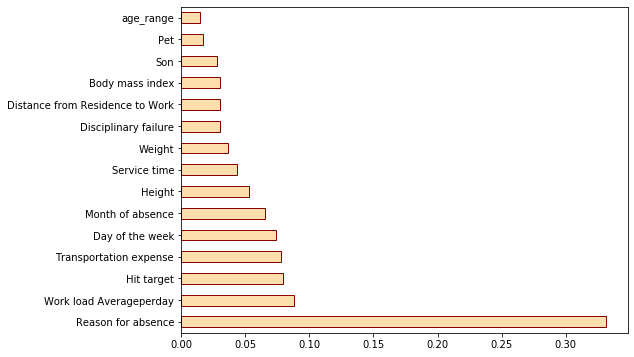

In [56]:
ax = (pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(19)
   .plot(kind='barh', figsize=(8,6), color='navajowhite',edgecolor='darkred'))
plt.show()

In [60]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_sample_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf': min_sample_leaf,
               'bootstrap' : bootstrap
              }

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv=5, error_score= np.nan, 
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 30.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [61]:
# The below will provide us the best parameters from the Random Search CV.

rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [70]:
from sklearn.ensemble import RandomForestClassifier
model_random = rf_random.best_estimator_
model_random.fit(X_train, y_train)
predictions_random = model_random.predict(X_test)

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions_random))


Accuracy: 0.8288288288288288


In [72]:
print(classification_report(y_test, predictions_random))


              precision    recall  f1-score   support

           0       0.88      0.82      0.85       130
           1       0.76      0.85      0.80        92

    accuracy                           0.83       222
   macro avg       0.82      0.83      0.83       222
weighted avg       0.83      0.83      0.83       222



In [73]:
metrics.f1_score(y_test, predictions_random, average='micro')


0.8288288288288288

In [74]:
#Let us check the train & test data for each classification.

from collections import Counter


In [75]:
Counter(y_train)


Counter({'0': 288, '1': 230})

In [76]:
Counter(y_test)


Counter({'0': 130, '1': 92})

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap' : [True],
    'max_depth' : [8, 10, 12, 14],
    'max_features' : ['sqrt'],
    'min_samples_leaf' : [1, 3, 4],
    'min_samples_split' : [7, 10, 12],
    'n_estimators' : [250, 275, 300, 325]
    
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv=5, n_jobs = -1, error_score=np.nan, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 15.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [78]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 275}

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
model_grid = grid_search.best_estimator_
model_grid.fit(X_train, y_train)
predictions_grid = model_grid.predict(X_test)


In [81]:
print(classification_report(y_test, predictions_grid))


              precision    recall  f1-score   support

           0       0.87      0.82      0.85       130
           1       0.77      0.83      0.80        92

    accuracy                           0.82       222
   macro avg       0.82      0.82      0.82       222
weighted avg       0.83      0.82      0.83       222



In [ ]:
#Here RF is the best model with 82% accuracy

In [83]:
#save the model

from sklearn.externals import joblib

joblib.dump(rf,'Model_AbsenteeismPrediction.pkl')

['Model_AbsenteeismPrediction.pkl']